# 규제 선형 모델

- 다항식이 복자해지면서 회귀 계수값이 크게 설정되고 과대 적합을 유발함
    -> 훈련 데이터에서는 높은 성능을 보이지만, 테스트 데이터에서는 낮은 성능을 보임
- 선형 모델의 목적은 비용 함수를 최소화하는 것
- 이때, 규제 선형 모델은 비용 함수를 최소화 하는 데에 패널티(alpha) 를 적용해 회귀 계수의 크기를 제한함

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ridge 회귀
- L2 규제를 적용한 회귀 모델
- 회귀 계수들의 제곱합에 alpha 패널티를 곱해 비용 신청에 반영
- alpha 값이 커지면 회귀 계수가 작아짐 -> 과대적합 방지

In [5]:
from sklearn.model_selection import train_test_split

boston_df = pd.read_csv('./data/boston_housing_train.csv')

x = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)



In [9]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=1)   # 규제 제약값

reg.fit(x_train, y_train)
print(reg.score(x_train, y_train), reg.score(x_test, y_test))

print(reg.coef_)
# [-0.12137453  0.03421897 -0.01307037  1.8210257  -1.68747299  4.09010212
#  -0.01841796 -1.18806788  0.24351944 -0.01208251 -0.76717881  0.01369631
#  -0.5734354 ]

0.7461161787884156 0.6789748327846079
[-0.12383039  0.03139178  0.01767668  2.54277179 -8.77249222  4.37980204
 -0.01537349 -1.29086084  0.24406848 -0.01082435 -0.83346553  0.01348642
 -0.53435396]


In [16]:
# reg.alpha
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

# 평가 지표들
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2= r2_score(y_true, y_pred)
    print(f'MES: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}')

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('reg', Ridge(alpha=10))     # 규제가 강할수록 더 높은 최적의 수를 가지게 된다
])

model.fit(x_train, y_train)
print(model.score(x_train, y_train), model.score(x_test, y_test))
evaluate_regression(y_test, model.predict(x_test))

0.9082670961763133 0.8090409130523409
MES: 13.37231941377526, RMSE: 3.6568182090138497, MAE: 2.4853875100125165, R2: 0.8090409130523409


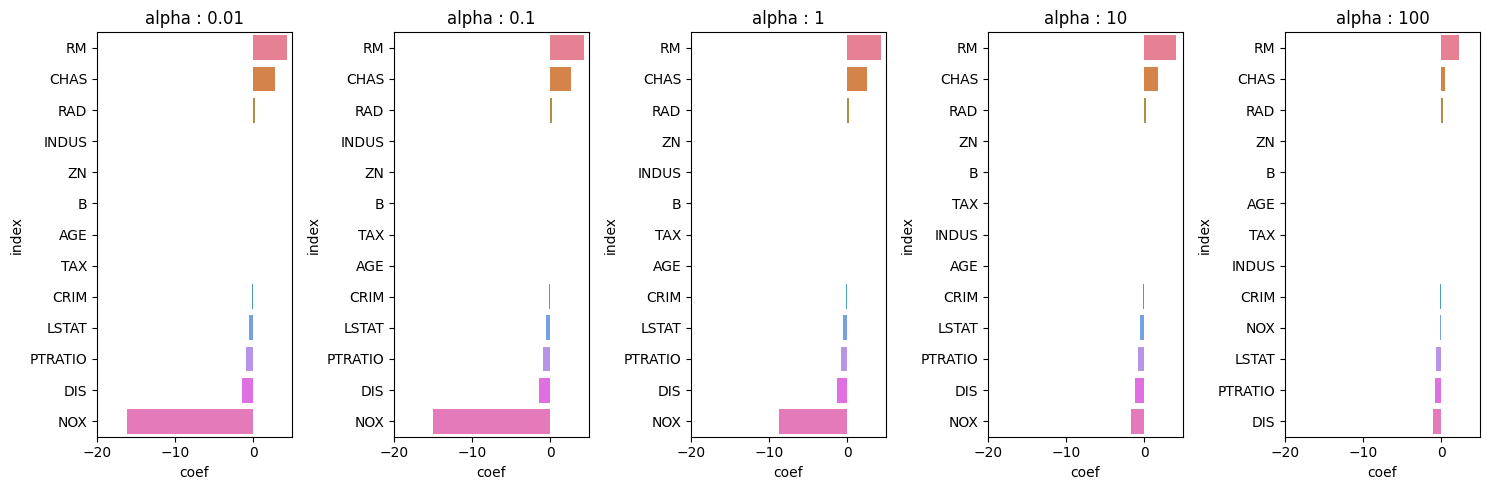

In [38]:
# alpha 값에 따른 시각화
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))

alphas = [0.01, 0.1, 1, 10, 100]

for i, alpha in enumerate(alphas):
    model = Pipeline([
        # ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('reg', Ridge(alpha=alpha))     
    ])
    model.fit(x_train, y_train)

    coef = model.named_steps['reg'].coef_
    coef_ser = pd.Series(coef, index=x.columns)
    coef_ser.name = 'alpha : ' + str(alpha)
    coef_ser = coef_ser.sort_values(ascending=False)

    ax[i].set_title(coef_ser.name)
    ax[i].set_xlabel('coef')
    ax[i].set_ylabel('index')
    ax[i].set_xlim(-20, 5)
    sns.barplot(x=coef_ser.values, y=coef_ser.index, ax=ax[i], hue=coef_ser.index)
plt.tight_layout()
plt.show()

### Lasso 회귀
- L1 규제를 적용한 선형 회귀 모델
- 회귀계수 절대값이 합을 alpha 값과 곱해 규제 정도 지정
- alpha 값이 커지면 규제 정도가 커짐
- 회귀 계수를 0까지 줄일 수 있음 = 해당 특성을 아예 반영하지 않도록 함 = 특선 선택 효과가 있음

In [42]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=10)

reg.fit(x_train, y_train)

print(reg.score(x_train, y_train), reg.score(x_test, y_test))

print(reg.coef_)

0.5373948270602298 0.4945997251309123
[-0.          0.00806625 -0.          0.          0.          0.
  0.         -0.          0.         -0.00896833 -0.          0.01014021
 -0.62986968]


### ElasticNet 회귀
- L1, L2 규제를 함께 적용할 수 있는 회귀 모델

**하이퍼 파라미터**
- alpha: 규제 정도 (L1, L2)
- l1_ratio: alpha 값 중 L1 규제의 비율

In [51]:
from sklearn.linear_model import ElasticNet

reg = ElasticNet(alpha=10, l1_ratio=0.2)   # reg.alpha 기본값 : 1, reg.l1_ratio 기본값: 0.5

reg.fit(x_train, y_train)

print(reg.score(x_train, y_train), reg.score(x_test, y_test))

print(reg.coef_)

# alpha = 1
# 0.6914758177681419 0.6584782663638298
# [-0.11304195  0.03616532 -0.02567739  0.01331622 -0.          1.08071656
#   0.01537004 -0.76232832  0.28676237 -0.01396857 -0.76004478  0.01203943
#  -0.78366959]

0.582267021479868 0.5515443461890217
[-0.04757351  0.0297799  -0.          0.          0.          0.01006149
  0.0263796  -0.01728823  0.0623326  -0.00926173 -0.19693406  0.01084713
 -0.69194846]


In [54]:
model = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('reg', ElasticNet(alpha=10, l1_ratio=.6))     # 규제가 강할수록 더 높은 최적의 수를 가지게 된다
])

model.fit(x_train, y_train)
print(model.score(x_train, y_train), model.score(x_test, y_test))
evaluate_regression(y_test, model.predict(x_test))

0.9575858638993846 0.7398730490075477
MES: 18.21594736550021, RMSE: 4.268014452353718, MAE: 2.6511018954793153, R2: 0.7398730490075477


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.218e+02, tolerance: 3.361e+00
  model = cd_fast.enet_coordinate_descent(
